In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, recall_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from IPython.core.display import HTML
from sklearn.tree import export_text
from operator import itemgetter

In [2]:
dataset = pd.read_csv('milknew.csv')

In [3]:
# Первые 5 строк датасета
dataset.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
# Размер датасета - 1059 строк, 8 колонок
dataset.shape

(1059, 8)

In [5]:
dataset.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [6]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in dataset.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = dataset[dataset[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

pH - 0
Temprature - 0
Taste - 0
Odor - 0
Fat  - 0
Turbidity - 0
Colour - 0
Grade - 0


In [7]:
# Основные статистические характеристки набора данных
dataset.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
X

array([[  6.6,  35. ,   1. , ...,   1. ,   0. , 254. ],
       [  6.6,  36. ,   0. , ...,   0. ,   1. , 253. ],
       [  8.5,  70. ,   1. , ...,   1. ,   1. , 246. ],
       ...,
       [  3. ,  40. ,   1. , ...,   1. ,   1. , 255. ],
       [  6.8,  43. ,   1. , ...,   1. ,   0. , 250. ],
       [  8.6,  55. ,   0. , ...,   1. ,   1. , 255. ]])

In [10]:
y

array(['high', 'high', 'low', ..., 'low', 'high', 'low'], dtype=object)

In [11]:
milk_x_ds_lr = pd.DataFrame(data=dataset, columns=['pH', 'Temprature', 'Taste', 'Odor', 'Turbidity', 'Colour'])
milk_x_ds_lr['x0'] = 1
milk_x_ds_lr['target'] = dataset['Grade']
milk_x_ds_lr

,pH,Temprature,Taste,Odor,Turbidity,Colour,x0,target
0,6.6,35,1,0,0,254,1,high
1,6.6,36,0,1,1,253,1,high
2,8.5,70,1,1,1,246,1,low
3,9.5,34,1,1,1,255,1,low
4,6.6,37,0,0,0,255,1,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,247,1,medium
1055,6.7,38,1,0,0,255,1,high
1056,3.0,40,1,1,1,255,1,low
1057,6.8,43,1,0,0,250,1,high


In [12]:
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [13]:
bin_milk_y = convert_target_to_binary(dataset['Grade'], 'high')

In [14]:
bin_milk_y2 = convert_target_to_binary(dataset['Grade'], 'medium')

In [15]:
bin_milk_y3 = convert_target_to_binary(dataset['Grade'], 'low')

In [16]:
milk_x_ds_lr['target_bin'] = bin_milk_y
milk_x_ds_lr.head()

,pH,Temprature,Taste,Odor,Turbidity,Colour,x0,target,target_bin
0,6.6,35,1,0,0,254,1,high,1
1,6.6,36,0,1,1,253,1,high,1
2,8.5,70,1,1,1,246,1,low,0
3,9.5,34,1,1,1,255,1,low,0
4,6.6,37,0,0,0,255,1,medium,0


In [17]:
milk_x_ds_lr['target_bin2'] = bin_milk_y2
milk_x_ds_lr.head()

,pH,Temprature,Taste,Odor,Turbidity,Colour,x0,target,target_bin,target_bin2
0,6.6,35,1,0,0,254,1,high,1,0
1,6.6,36,0,1,1,253,1,high,1,0
2,8.5,70,1,1,1,246,1,low,0,0
3,9.5,34,1,1,1,255,1,low,0,0
4,6.6,37,0,0,0,255,1,medium,0,1


In [18]:
milk_x_ds_lr['target_bin3'] = bin_milk_y3
milk_x_ds_lr.head()

,pH,Temprature,Taste,Odor,Turbidity,Colour,x0,target,target_bin,target_bin2,target_bin3
0,6.6,35,1,0,0,254,1,high,1,0,0
1,6.6,36,0,1,1,253,1,high,1,0,0
2,8.5,70,1,1,1,246,1,low,0,0,1
3,9.5,34,1,1,1,255,1,low,0,0,1
4,6.6,37,0,0,0,255,1,medium,0,1,0


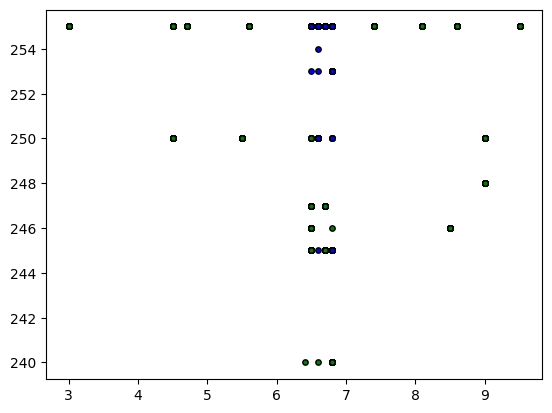

In [19]:
# Визуализация данных
colors = "gb"
X_viz = milk_x_ds_lr[['pH', 'Colour']].values
y_viz = milk_x_ds_lr['target_bin'].values
n_classes = len(np.unique(y_viz))
for i, color in zip(range(n_classes), colors):
    idx = np.where(y_viz == i)
    plt.scatter(X_viz[idx, 0], X_viz[idx, 1], 
                c=color, 
                cmap=plt.cm.RdYlBu, 
                edgecolor='black', s=15)
plt.show()    

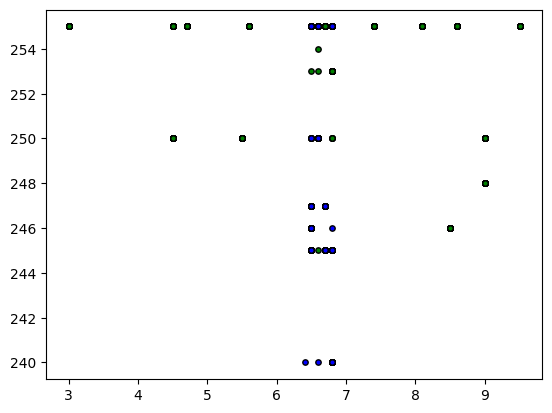

In [20]:
# Визуализация данных
colors = "gb"
X_viz = milk_x_ds_lr[['pH', 'Colour']].values
y_viz = milk_x_ds_lr['target_bin2'].values
n_classes = len(np.unique(y_viz))
for i, color in zip(range(n_classes), colors):
    idx = np.where(y_viz == i)
    plt.scatter(X_viz[idx, 0], X_viz[idx, 1], 
                c=color, 
                cmap=plt.cm.RdYlBu, 
                edgecolor='black', s=15)
plt.show()    

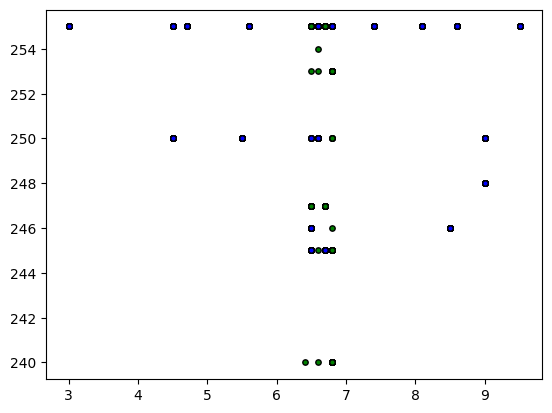

In [21]:
# Визуализация данных
colors = "gb"
X_viz = milk_x_ds_lr[['pH', 'Colour']].values
y_viz = milk_x_ds_lr['target_bin3'].values
n_classes = len(np.unique(y_viz))
for i, color in zip(range(n_classes), colors):
    idx = np.where(y_viz == i)
    plt.scatter(X_viz[idx, 0], X_viz[idx, 1], 
                c=color, 
                cmap=plt.cm.RdYlBu, 
                edgecolor='black', s=15)
plt.show()    

In [23]:
milk_X_train, milk_X_test, milk_y_train, milk_y_test = train_test_split(
    milk_x_ds_lr[['pH', 'Temprature', 'Taste', 'Odor', 'Turbidity', 'Colour']].values, 
    milk_x_ds_lr['target_bin'].values, test_size=0.1, random_state=1)

In [24]:
cl1 = LogisticRegression()

In [25]:
milk_X_train

array([[  5.5,  45. ,   1. ,   0. ,   1. , 250. ],
       [  6.5,  36. ,   0. ,   0. ,   0. , 247. ],
       [  9. ,  43. ,   1. ,   0. ,   1. , 250. ],
       ...,
       [  3. ,  40. ,   1. ,   1. ,   1. , 255. ],
       [  3. ,  40. ,   1. ,   1. ,   1. , 255. ],
       [  6.5,  37. ,   0. ,   0. ,   0. , 245. ]])

In [26]:
cl1.fit(milk_X_train, milk_y_train)

C:\PycharmProjects\OAD_NIRS\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [27]:
pred_milk_y_test = cl1.predict(milk_X_test)
pred_milk_y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
pred_milk_y_test_proba = cl1.predict_proba(milk_X_test)
pred_milk_y_test_proba[:10]

array([[0.84271804, 0.15728196],
       [0.57761277, 0.42238723],
       [0.65434553, 0.34565447],
       [0.87933515, 0.12066485],
       [0.83813538, 0.16186462],
       [0.84271804, 0.15728196],
       [0.42219682, 0.57780318],
       [0.98993645, 0.01006355],
       [0.83813538, 0.16186462],
       [0.18023759, 0.81976241]])

In [29]:
accuracy_score(milk_y_test, pred_milk_y_test)


0.7924528301886793

C:\PycharmProjects\OAD_NIRS\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1059).

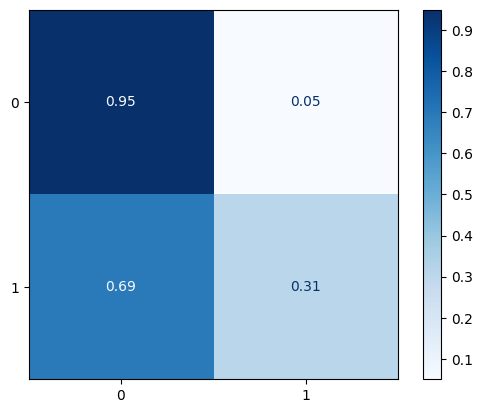

In [30]:
plot_confusion_matrix(cl1, milk_X_test, milk_y_test, 
                      display_labels=milk_x_ds_lr['target_bin'].values, 
                      cmap=plt.cm.Blues, normalize='true')

In [43]:
###################################
###################################
###################################
###################################
###################################
###################################
###################################

In [32]:
milk_X_train2, milk_X_test2, milk_y_train2, milk_y_test2 = train_test_split(
    milk_x_ds_lr[['pH', 'Temprature', 'Taste', 'Odor', 'Turbidity', 'Colour']].values, 
    milk_x_ds_lr['target'].values, test_size=0.1, random_state=1)

In [33]:
cl2 = LogisticRegression(multi_class='multinomial')

In [34]:
cl2.fit(milk_X_train2, milk_y_train2)

C:\PycharmProjects\OAD_NIRS\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial')

In [35]:
pred_milk_y_test2 = cl2.predict(milk_X_test2)
pred_milk_y_test2

array(['medium', 'low', 'low', 'medium', 'medium', 'medium', 'high',
       'low', 'medium', 'high', 'high', 'medium', 'high', 'medium', 'low',
       'high', 'high', 'high', 'low', 'low', 'medium', 'high', 'low',
       'low', 'medium', 'medium', 'high', 'medium', 'high', 'medium',
       'low', 'medium', 'high', 'low', 'medium', 'medium', 'high', 'high',
       'medium', 'high', 'low', 'high', 'medium', 'medium', 'high',
       'high', 'low', 'high', 'medium', 'low', 'low', 'medium', 'medium',
       'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium',
       'low', 'low', 'medium', 'low', 'medium', 'low', 'low', 'low',
       'medium', 'low', 'low', 'low', 'low', 'medium', 'low', 'high',
       'low', 'low', 'high', 'low', 'low', 'medium', 'low', 'high', 'low',
       'medium', 'low', 'medium', 'low', 'medium', 'medium', 'medium',
       'medium', 'medium', 'low', 'medium', 'low', 'medium', 'medium',
       'low', 'medium', 'medium', 'medium', 'high', 'low'], dtype=ob

In [36]:
pred_milk_y_test_proba2 = cl2.predict_proba(milk_X_test2)
pred_milk_y_test_proba2[:10]

array([[0.18652205, 0.12592619, 0.68755176],
       [0.30294219, 0.69480731, 0.0022505 ],
       [0.45191536, 0.45679397, 0.09129066],
       [0.26489234, 0.34034153, 0.39476613],
       [0.1752869 , 0.11017531, 0.71453779],
       [0.18652205, 0.12592619, 0.68755176],
       [0.55357476, 0.36039691, 0.08602834],
       [0.00154666, 0.99677637, 0.00167697],
       [0.1752869 , 0.11017531, 0.71453779],
       [0.79889144, 0.04556912, 0.15553944]])

In [37]:
accuracy_score(milk_y_test2, pred_milk_y_test2)

0.6037735849056604

In [88]:
recall_score(milk_y_test2, pred_milk_y_test2, average=None)

array([0.26923077, 0.72093023, 0.7027027 ])

C:\PycharmProjects\OAD_NIRS\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (1059).

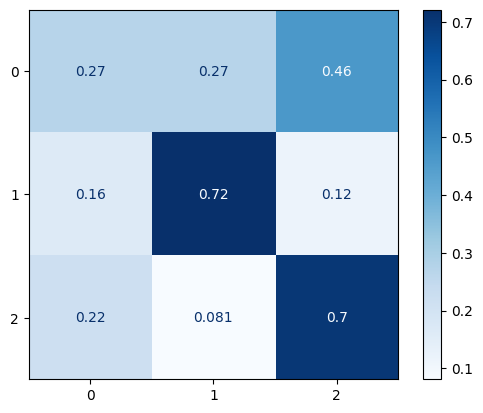

In [38]:
plot_confusion_matrix(cl2, milk_X_test2, milk_y_test2, 
                      display_labels=milk_x_ds_lr['target'].values, 
                      cmap=plt.cm.Blues, normalize='true')

In [39]:
pred_milk_y_train2 = cl2.predict(milk_X_train2)
pred_milk_y_train2

array(['low', 'medium', 'low', 'low', 'low', 'medium', 'medium', 'low',
       'low', 'medium', 'high', 'low', 'low', 'low', 'low', 'low',
       'medium', 'low', 'low', 'low', 'high', 'medium', 'medium',
       'medium', 'medium', 'low', 'high', 'medium', 'high', 'medium',
       'low', 'low', 'medium', 'high', 'low', 'low', 'medium', 'low',
       'medium', 'high', 'medium', 'low', 'medium', 'medium', 'low',
       'high', 'low', 'medium', 'low', 'medium', 'medium', 'medium',
       'low', 'low', 'medium', 'low', 'medium', 'low', 'medium', 'high',
       'medium', 'low', 'medium', 'low', 'low', 'low', 'medium', 'medium',
       'low', 'low', 'low', 'low', 'low', 'medium', 'low', 'medium',
       'high', 'low', 'medium', 'low', 'high', 'medium', 'medium', 'low',
       'medium', 'medium', 'low', 'medium', 'low', 'low', 'medium', 'low',
       'high', 'medium', 'medium', 'low', 'low', 'medium', 'low',
       'medium', 'low', 'high', 'medium', 'low', 'low', 'low', 'low',
       'medium'

In [40]:
accuracy_score(milk_y_train2, pred_milk_y_train2)

0.6778593913955928

C:\PycharmProjects\OAD_NIRS\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (1059).

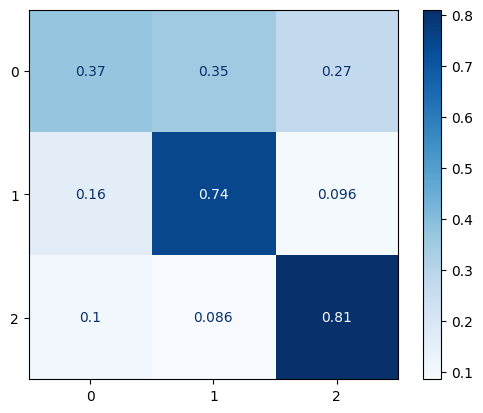

In [41]:
plot_confusion_matrix(cl2, milk_X_train2, milk_y_train2, 
                      display_labels=milk_x_ds_lr['target'].values, 
                      cmap=plt.cm.Blues, normalize='true')

In [42]:
###################################
###################################
###################################
###################################
###################################
###################################
###################################
###################################

In [69]:
# Используем датасет milknew с двумя первыми признаками
X = dataset.iloc[:, :2].values
y = dataset['Grade'].values

In [70]:
X

array([[ 6.6, 35. ],
       [ 6.6, 36. ],
       [ 8.5, 70. ],
       ...,
       [ 3. , 40. ],
       [ 6.8, 43. ],
       [ 8.6, 55. ]])

In [71]:
y

array(['high', 'high', 'low', ..., 'low', 'high', 'low'], dtype=object)

In [72]:
milk_x_ds_svm = pd.DataFrame(data=dataset, columns=['pH', 'Temprature', 'Taste', 'Odor', 'Turbidity', 'Colour'])
milk_x_ds_svm['target'] = dataset['Grade']
milk_x_ds_svm

,pH,Temprature,Taste,Odor,Turbidity,Colour,target
0,6.6,35,1,0,0,254,high
1,6.6,36,0,1,1,253,high
2,8.5,70,1,1,1,246,low
3,9.5,34,1,1,1,255,low
4,6.6,37,0,0,0,255,medium
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,247,medium
1055,6.7,38,1,0,0,255,high
1056,3.0,40,1,1,1,255,low
1057,6.8,43,1,0,0,250,high


In [73]:
milk_x_ds_svm['target'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [74]:
le = LabelEncoder()
milk_x_ds_svm_le = le.fit_transform(milk_x_ds_svm['target'])
milk_x_ds_svm_le

array([0, 0, 1, ..., 1, 0, 1])

In [75]:
np.unique(milk_x_ds_svm_le)

array([0, 1, 2])

In [76]:
le.inverse_transform([0, 1, 2])

array(['high', 'low', 'medium'], dtype=object)

In [77]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(X, milk_x_ds_svm_le)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=milk_x_ds_svm_le, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('pH')
    ax.set_ylabel('Temprature')
#     ax.set_xlabel('Sepal length')
#     ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

C:\PycharmProjects\OAD_NIRS\venv\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


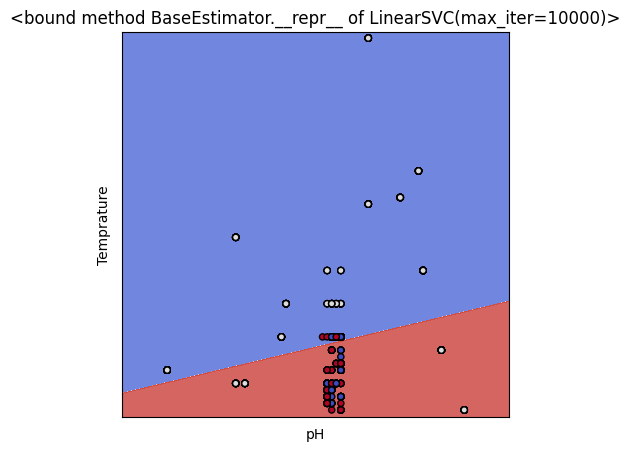

In [78]:
plot_cl(LinearSVC(C=1.0, max_iter=10000))

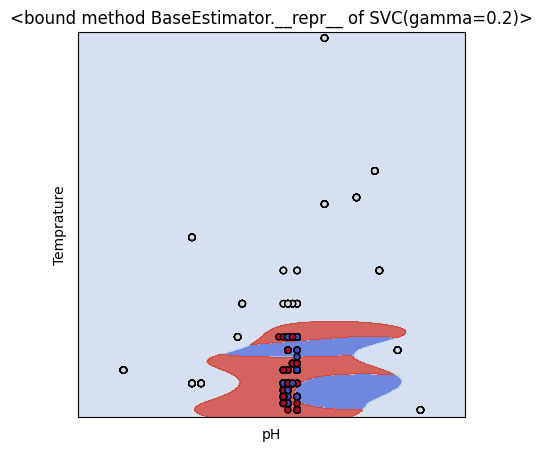

In [79]:
plot_cl(SVC(kernel='rbf', gamma=0.2, C=1.0))

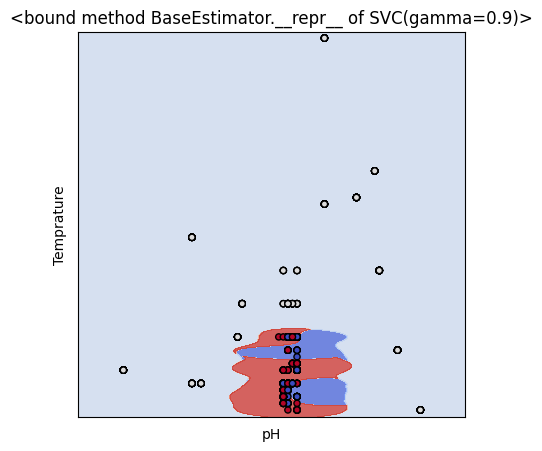

In [80]:
plot_cl(SVC(kernel='rbf', gamma=0.9, C=1.0))

In [81]:
model1 = SVC(kernel='rbf', gamma=0.9, C=1.0)

In [82]:
milk_X_train_svm_1, milk_X_test_svm_1, milk_y_train_svm_1, milk_y_test_svm_1 = train_test_split(
    X, 
    milk_x_ds_svm_le, test_size=0.1, random_state=1)

In [83]:
model1.fit(milk_X_train_svm_1, milk_y_train_svm_1)

SVC(gamma=0.9)

In [84]:
y_svm_predict = model1.predict(milk_X_test_svm_1)

In [87]:
recall_score(milk_y_test_svm_1, y_svm_predict, average=None)

array([0.38461538, 1.        , 0.89189189])

C:\PycharmProjects\OAD_NIRS\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (1059).

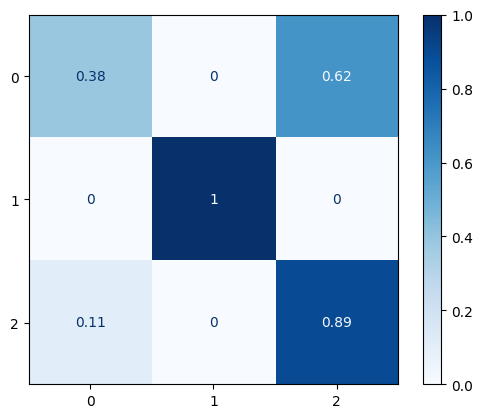

In [89]:
plot_confusion_matrix(model1, milk_X_test_svm_1, milk_y_test_svm_1, 
                      display_labels=milk_x_ds_svm['target'].values, 
                      cmap=plt.cm.Blues, normalize='true')

In [ ]:
###################################
###################################
###################################
###################################
###################################
###################################
###################################
###################################

In [92]:
milk_ds_dt = milk_x_ds_svm
milk_ds_dt

,pH,Temprature,Taste,Odor,Turbidity,Colour,target
0,6.6,35,1,0,0,254,high
1,6.6,36,0,1,1,253,high
2,8.5,70,1,1,1,246,low
3,9.5,34,1,1,1,255,low
4,6.6,37,0,0,0,255,medium
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,247,medium
1055,6.7,38,1,0,0,255,high
1056,3.0,40,1,1,1,255,low
1057,6.8,43,1,0,0,250,high


In [96]:
milk_x_ds_dt = pd.DataFrame(data=dataset, columns=['pH', 'Temprature', 'Taste', 'Odor', 'Turbidity', 'Colour'])
milk_x_ds_dt 

,pH,Temprature,Taste,Odor,Turbidity,Colour
0,6.6,35,1,0,0,254
1,6.6,36,0,1,1,253
2,8.5,70,1,1,1,246
3,9.5,34,1,1,1,255
4,6.6,37,0,0,0,255
...,...,...,...,...,...,...
1054,6.7,45,1,1,0,247
1055,6.7,38,1,0,0,255
1056,3.0,40,1,1,1,255
1057,6.8,43,1,0,0,250


In [99]:
# Обучим дерево на всех признаках milknew
milk_tree_cl = DecisionTreeClassifier(random_state=1)
milk_tree_cl.fit(milk_x_ds_dt, milk_ds_dt['target'])
milk_tree_cl

DecisionTreeClassifier(random_state=1)

In [101]:
tree_rules = export_text(milk_tree_cl, feature_names=list(milk_x_ds_dt.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [102]:
# Важность признаков
list(zip(milk_x_ds_dt.columns.values, milk_tree_cl.feature_importances_))

[('pH', 0.5346910855700641),
 ('Temprature', 0.11633974855983922),
 ('Taste', 0.043578937433242586),
 ('Odor', 0.14110779715330124),
 ('Turbidity', 0.06578838959173856),
 ('Colour', 0.09849404169181436)]

In [104]:
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

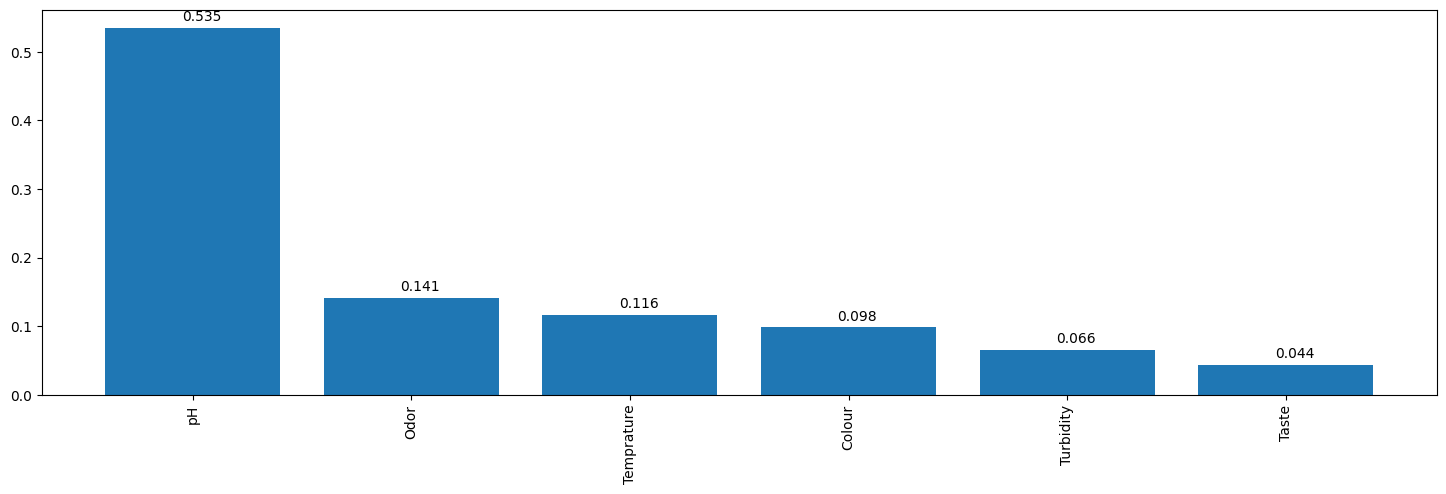

In [105]:
milk_tree_cl_fl, milk_tree_cl_fd = draw_feature_importances(milk_tree_cl, milk_x_ds_dt)

In [106]:
model2 = DecisionTreeClassifier(random_state=1)

In [107]:
milk_X_train_tree_1, milk_X_test_tree_1, milk_y_train_tree_1, milk_y_test_tree_1 = train_test_split(
    milk_x_ds_dt , 
    milk_ds_dt['target'], test_size=0.1, random_state=1)

In [108]:
model2.fit(milk_X_train_tree_1, milk_y_train_tree_1)

DecisionTreeClassifier(random_state=1)

In [109]:
y_tree_predict = model2.predict(milk_X_test_tree_1)

In [110]:
recall_score(milk_y_test_tree_1, y_tree_predict, average=None)

array([0.96153846, 1.        , 1.        ])

C:\PycharmProjects\OAD_NIRS\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (1059).

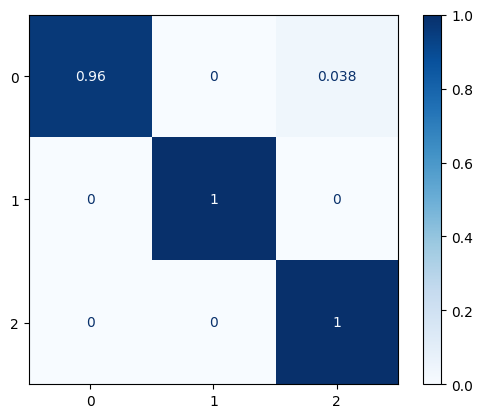

In [112]:
plot_confusion_matrix(model2, milk_X_test_tree_1, milk_y_test_tree_1, 
                      display_labels=milk_ds_dt['target'].values, 
                      cmap=plt.cm.Blues, normalize='true')